CUSTOMER LIFETIME VALUE PREDICTION

### Problem Definition
Customer Lifetime Value (CLV) is the total profit a customer generates during their relationship with a business. In subscription models, predicting CLV helps companies focus on long-term profitability, optimize marketing spend, and improve retention strategies. Accurate CLV prediction enables better resource allocation and sustainable growth, as not all customers contribute equally to revenue.


### Objectives
Objective:
Predict Customer Lifetime Value (CLV) using various regression models — Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor — based on customers’ spending and engagement history.

-Approach:

Train and compare multiple regression models to estimate each customer’s lifetime value.

Segment customers into tiers (high, medium, low CLV) based on predicted values to enable targeted retention and upsell strategies.

Emphasize interpretable and actionable results to assist business decision-makers in resource allocation and marketing optimization.

-Scope:
This project focuses on subscription-based businesses that maintain structured behavioral and financial data, such as usage frequency, tenure, total revenue, and active status.
The goal is to enhance customer retention, forecast long-term revenue, and optimize marketing spend using data-driven insights.


### Dataset
Source: [Kaggle -Subscription based dataset ]
Includes:
- Demographic data (Age, Gender, Location, Plan)
- Behavioral data (Tenure, Usage frequency, Payment behavior)
- Target variable: **Customer lifetime value**

### Tools
Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, XGBoost

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Install and import external models if not present (assuming they are available in the environment)
try:
    from xgboost import XGBRegressor
except ImportError:
    print("XGBoost not installed. Skipping XGBoost Regressor.")
    XGBRegressor = None
try:
    from lightgbm import LGBMRegressor
except ImportError:
    print("LightGBM not installed. Skipping LightGBM Regressor.")
    LGBMRegressor = None
try:
    from catboost import CatBoostRegressor
    # Suppress CatBoost logging during training for cleaner output
    class SilentCatBoostRegressor(CatBoostRegressor):
        def __init__(self, **kwargs):
            super().__init__(verbose=0, **kwargs)
except ImportError:
    print("CatBoost not installed. Skipping CatBoost Regressor.")
    CatBoostRegressor = None
    SilentCatBoostRegressor = None

# Set a random seed for reproducibility
RANDOM_STATE = 42

CatBoost not installed. Skipping CatBoost Regressor.


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
# Load the dataset
df = pd.read_csv('subscription_clv_ready.csv')
display(df)

# Drop CustomerID as it's an identifier
df = df.drop('CustomerID', axis=1)

# Separate features (X) and target (y)
X = df.drop('CLV', axis=1)
y = df['CLV']

# One-Hot Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

,CustomerID,Age,Gender,Subscription_Type,Monthly_Fee,Tenure_Months,Avg_Listening_Hours,Device_Type,Support_Tickets,Referral_Count,Discount_Used,Region,Total_Revenue,Engagement_Score,Support_Ticket_Rate,Referral_Effect,Discount_Impact,CLV
0,1,56,Male,Student,0,1,7.5,Smart Speaker,2,0,Yes,Urban,0,7.5,2.00,0,0.9,0.00
1,2,46,Male,Family,99,57,31.4,Tablet,0,0,No,Urban,5643,1789.8,0.00,0,1.0,50000.00
2,3,32,Female,Premium,149,22,39.6,Tablet,2,0,Yes,Urban,3278,871.2,0.09,0,0.9,25702.14
3,4,60,Female,Premium,149,7,11.9,Smart Speaker,2,0,No,Urban,1043,83.3,0.29,0,1.0,868.82
4,5,25,Female,Premium,0,45,36.7,Smart Speaker,0,0,No,Urban,0,1651.5,0.00,0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,33,Male,Family,249,31,1.1,Desktop,1,0,Yes,Urban,7719,34.1,0.03,0,0.9,2368.96
9996,9997,29,Male,Free,0,58,20.2,Desktop,1,0,Yes,Semi-Urban,0,1171.6,0.02,0,0.9,0.00
9997,9998,18,Female,Student,0,30,17.1,Tablet,0,1,No,Urban,0,513.0,0.00,50,1.0,256.50
9998,9999,25,Female,Premium,99,51,31.3,Smart Speaker,0,2,No,Urban,5049,1596.3,0.00,100,1.0,50000.00


In [ ]:
# Scale features for linear models (Tree-based models are less sensitive, but scaling provides a clean, standardized input)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame for better feature name handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
display(X_train_scaled_df)
display(X_test_scaled_df)

,Age,Monthly_Fee,Tenure_Months,Avg_Listening_Hours,Support_Tickets,Referral_Count,Total_Revenue,Engagement_Score,Support_Ticket_Rate,Referral_Effect,...,Gender_Male,Subscription_Type_Free,Subscription_Type_Premium,Subscription_Type_Student,Device_Type_Mobile,Device_Type_Smart Speaker,Device_Type_Tablet,Discount_Used_Yes,Region_Semi-Urban,Region_Urban
0,0.076850,0.522804,1.038790,0.214597,-0.001264,1.270270,1.167980,0.910527,-0.281719,1.270270,...,1.004259,1.518481,-0.817347,-0.496286,-0.581007,1.724005,-0.569844,-0.835340,1.513995,-1.216491
1,-0.960792,-0.113286,-0.821408,0.993510,-1.012191,-0.556143,-0.506848,-0.208667,-0.375366,-0.556143,...,1.004259,-0.658553,1.223470,-0.496286,-0.581007,-0.580045,-0.569844,-0.835340,-0.660504,-1.216491
2,-1.034910,0.522804,1.620101,0.400474,-1.012191,1.270270,1.616165,1.575429,-0.375366,1.270270,...,1.004259,-0.658553,1.223470,-0.496286,-0.581007,1.724005,-0.569844,1.197117,-0.660504,0.822036
3,0.002733,-1.372746,0.631871,-1.511403,1.009664,1.270270,-0.983308,-0.912535,-0.141249,1.270270,...,1.004259,-0.658553,-0.817347,-0.496286,-0.581007,1.724005,-0.569844,-0.835340,1.513995,-1.216491
4,0.966259,0.522804,-0.705146,0.480136,-0.001264,-0.556143,-0.176575,-0.286980,-0.094425,-0.556143,...,-0.995759,1.518481,-0.817347,-0.496286,1.721150,-0.580045,-0.569844,-0.835340,-0.660504,0.822036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.262728,1.794986,-1.053933,-1.254716,2.020591,1.270270,-0.084532,-1.028294,0.795219,1.270270,...,1.004259,-0.658553,1.223470,-0.496286,-0.581007,1.724005,-0.569844,1.197117,-0.660504,-1.216491
7996,-1.109027,1.158895,1.387577,0.913849,1.009664,-0.556143,2.249038,1.981441,-0.188072,-0.556143,...,-0.995759,1.518481,-0.817347,-0.496286,-0.581007,-0.580045,-0.569844,-0.835340,-0.660504,0.822036
7997,-1.627848,-1.372746,-0.007572,-1.608768,-0.001264,-0.556143,-0.983308,-1.044261,-0.234895,-0.556143,...,-0.995759,1.518481,-0.817347,-0.496286,-0.581007,1.724005,-0.569844,1.197117,1.513995,-1.216491
7998,1.707432,0.522804,1.678233,0.196895,-1.012191,-0.556143,1.660983,1.364820,-0.375366,-0.556143,...,1.004259,-0.658553,-0.817347,-0.496286,-0.581007,1.724005,-0.569844,-0.835340,-0.660504,0.822036


,Age,Monthly_Fee,Tenure_Months,Avg_Listening_Hours,Support_Tickets,Referral_Count,Total_Revenue,Engagement_Score,Support_Ticket_Rate,Referral_Effect,...,Gender_Male,Subscription_Type_Free,Subscription_Type_Premium,Subscription_Type_Student,Device_Type_Mobile,Device_Type_Smart Speaker,Device_Type_Tablet,Discount_Used_Yes,Region_Semi-Urban,Region_Urban
0,0.818024,1.158895,0.108691,0.604054,-1.012191,1.270270,0.932156,0.484747,-0.375366,1.270270,...,1.004259,1.518481,-0.817347,-0.496286,-0.581007,-0.580045,-0.569844,1.197117,1.513995,-1.216491
1,-0.071384,0.522804,1.561970,-1.024583,-0.001264,-0.556143,1.571346,-0.216270,-0.281719,-0.556143,...,1.004259,1.518481,-0.817347,-0.496286,-0.581007,1.724005,-0.569844,1.197117,-0.660504,0.822036
2,0.818024,1.158895,0.922527,-1.210460,2.020591,-0.556143,1.770172,-0.583886,-0.047602,-0.556143,...,-0.995759,-0.658553,-0.817347,2.014966,-0.581007,-0.580045,-0.569844,-0.835340,-0.660504,0.822036
3,-1.553731,1.158895,-1.286458,-0.449249,-1.012191,-0.556143,-0.504442,-0.937056,-0.375366,-0.556143,...,-0.995759,1.518481,-0.817347,-0.496286,-0.581007,-0.580045,1.754865,1.197117,-0.660504,0.822036
4,-1.701966,1.158895,-0.414490,0.683715,-0.001264,-0.556143,0.393432,0.058776,-0.188072,-0.556143,...,-0.995759,-0.658553,1.223470,-0.496286,1.721150,-0.580045,-0.569844,-0.835340,-0.660504,-1.216491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.701966,1.158895,-0.007572,0.019869,-1.012191,-0.556143,0.812440,0.004984,-0.375366,-0.556143,...,-0.995759,-0.658553,-0.817347,-0.496286,-0.581007,1.724005,-0.569844,-0.835340,-0.660504,-1.216491
1996,0.002733,-1.372746,-1.344589,-0.759044,-1.012191,-0.556143,-0.983308,-1.012708,-0.375366,-0.556143,...,-0.995759,1.518481,-0.817347,-0.496286,1.721150,-0.580045,-0.569844,-0.835340,-0.660504,0.822036
1997,1.114493,0.522804,-0.414490,1.356413,-1.012191,1.270270,0.047518,0.391037,-0.375366,1.270270,...,1.004259,-0.658553,-0.817347,-0.496286,1.721150,-0.580045,-0.569844,-0.835340,1.513995,-1.216491
1998,1.040376,-1.372746,0.050560,1.382967,-0.001264,-0.556143,-0.983308,0.951585,-0.234895,-0.556143,...,1.004259,1.518481,-0.817347,-0.496286,-0.581007,1.724005,-0.569844,-0.835340,1.513995,-1.216491


In [ ]:
# Define the models to train. Grouping by input data type.
# Linear models require scaled data, Tree models can use unscaled, but we'll use scaled data for consistency.
models_config = [
    # Baseline Models
    ("Linear Regression", LinearRegression(), X_train_scaled_df, X_test_scaled_df),
    ("Ridge Regression (L2)", Ridge(random_state=RANDOM_STATE), X_train_scaled_df, X_test_scaled_df),
    ("Lasso Regression (L1)", Lasso(random_state=RANDOM_STATE), X_train_scaled_df, X_test_scaled_df),
    ("Elastic Net Regression", ElasticNet(random_state=RANDOM_STATE), X_train_scaled_df, X_test_scaled_df),

    # Tree-Based Models
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=RANDOM_STATE), X_train_scaled_df, X_test_scaled_df),
    ("Random Forest Regressor", RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1), X_train_scaled_df, X_test_scaled_df),
    ("Gradient Boosting Regressor (GBR)", GradientBoostingRegressor(random_state=RANDOM_STATE), X_train_scaled_df, X_test_scaled_df),
]

# Add external models if available
if XGBRegressor:
    models_config.append(("XGBoost Regressor", XGBRegressor(random_state=RANDOM_STATE, n_jobs=-1), X_train_scaled_df, X_test_scaled_df))
if LGBMRegressor:
    models_config.append(("LightGBM Regressor", LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1), X_train_scaled_df, X_test_scaled_df))
if SilentCatBoostRegressor:
    # CatBoost is less sensitive to scaling, but we'll keep the scaled input for consistency.
    models_config.append(("CatBoost Regressor", SilentCatBoostRegressor(random_state=RANDOM_STATE, thread_count=-1), X_train_scaled_df, X_test_scaled_df))

In [ ]:
results = []
predictions_df = pd.DataFrame({'Actual_CLV': y_test})
best_r2_score = -np.inf
best_model_name = ""
best_predictions = None

for name, model, X_tr, X_te in models_config:
    if model is None: # Skip if the model was not imported
        continue

    # Train the model
    model.fit(X_tr, y_train)

    # Predict on the test set
    y_pred = model.predict(X_te)

    # Store predictions for later comparison table
    predictions_df[f'Predicted_CLV_{name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "")}'] = y_pred

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })
    # Track the best model for detailed visualization
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name
        best_predictions = y_pred

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

display(results_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 21
[LightGBM] [Info] Start training from score 16703.568162


,Model,R2 Score,MAE,MSE,RMSE
8,LightGBM Regressor,0.999560,216.635539,1.735298e+05,416.569132
7,XGBoost Regressor,0.999437,248.751542,2.220846e+05,471.258560
5,Random Forest Regressor,0.999221,264.523639,3.071520e+05,554.212945
4,Decision Tree Regressor,0.997495,431.788390,9.872102e+05,993.584505
6,Gradient Boosting Regressor (GBR),0.996573,711.622847,1.350742e+06,1162.214199
2,Lasso Regression (L1),0.828035,6077.977959,6.777578e+07,8232.604740
1,Ridge Regression (L2),0.828030,6078.036804,6.777778e+07,8232.725968
0,Linear Regression,0.828023,6077.462751,6.778063e+07,8232.899099
3,Elastic Net Regression,0.772497,7450.176885,8.966506e+07,9469.163460


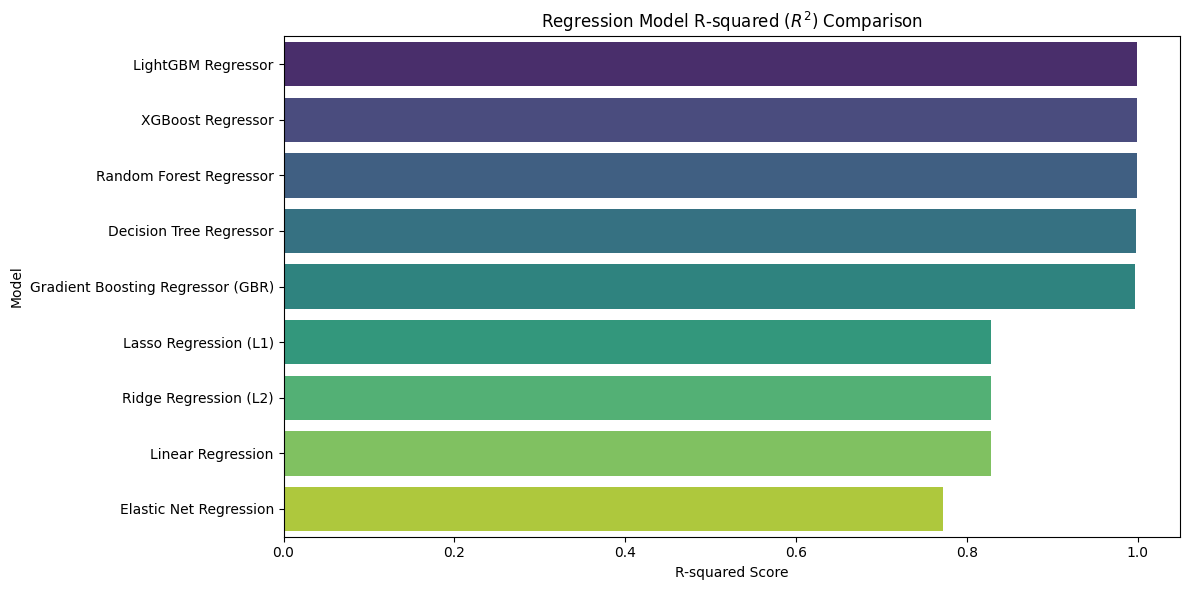

In [ ]:
# --- Plot 1: Model R2 Score Comparison ---
plt.figure(figsize=(12, 6))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title('Regression Model R-squared (${R}^2$) Comparison')
plt.xlabel('R-squared Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

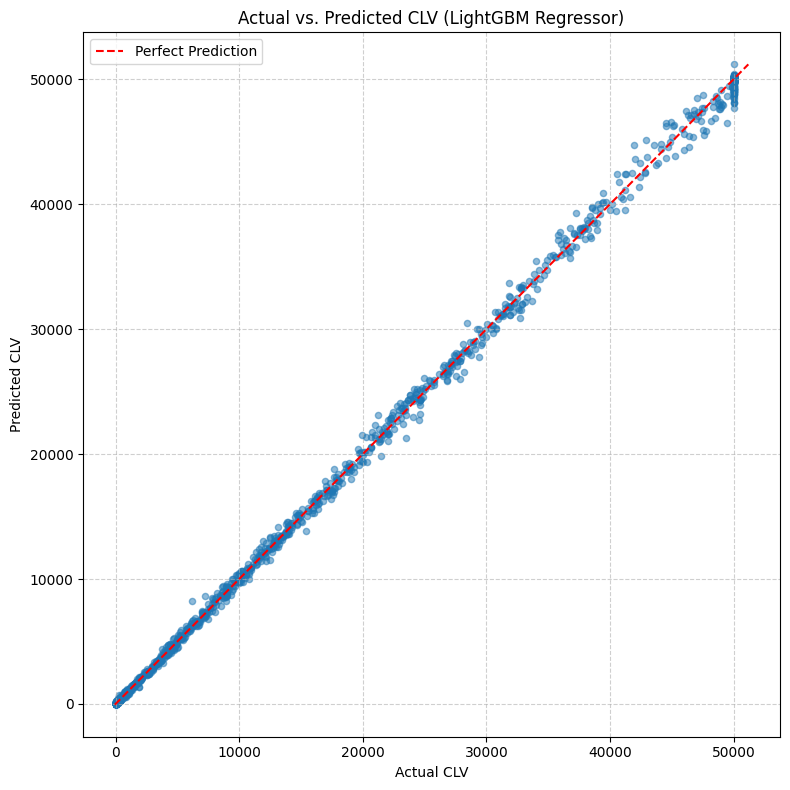

In [ ]:
# --- Plot 2: Actual vs. Predicted CLV (Best Model) ---
if best_model_name:
    plt.figure(figsize=(8, 8))
    # Scatter plot of actual vs. predicted values
    plt.scatter(y_test, best_predictions, alpha=0.5, s=20)
    # Add the diagonal line for perfect prediction
    max_val = max(y_test.max(), best_predictions.max())
    min_val = min(y_test.min(), best_predictions.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

    plt.title(f'Actual vs. Predicted CLV ({best_model_name})')
    plt.xlabel('Actual CLV')
    plt.ylabel('Predicted CLV')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [ ]:
# Select a small subset for comparison (e.g., first 10 test samples)
comparison_subset = predictions_df.head(20).copy()
comparison_subset['Index'] = comparison_subset.index.astype(str)

# Select columns for the comparison table (Actual CLV and the best model's prediction)
best_model_pred_col = [col for col in comparison_subset.columns if best_model_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "") in col][0]
comparison_table = comparison_subset[['Actual_CLV', best_model_pred_col]].reset_index(drop=True)
comparison_table.columns = ['Actual CLV', 'Predicted CLV']
print('Comparision of prediction vs actual CLV of first twenty samples')
display(comparison_table)

Comparision of prediction vs actual CLV of first twenty samples


,Actual CLV,Predicted CLV
0,50000.00,48113.966149
1,38340.80,37408.362616
2,28212.63,26554.705511
3,1753.75,1711.880194
4,29581.15,29598.882765
5,729.30,636.816299
6,50000.00,50044.599685
7,0.00,-1.121746
8,50000.00,49994.933985
9,8028.46,7380.827751


In [ ]:
# --- Plot 3: Actual vs. Predicted CLV (Subset Bar Plot) ---
plt.figure(figsize=(12, 6))
melted_comparison = pd.melt(comparison_subset, id_vars=['Index'], value_vars=['Actual_CLV', best_model_pred_col],
                            var_name='Type', value_name='CLV_Value')
melted_comparison['Type'] = melted_comparison['Type'].replace({best_model_pred_col: 'Predicted CLV', 'Actual_CLV': 'Actual CLV'})

sns.barplot(x='Index', y='CLV_Value', hue='Type', data=melted_comparison, palette='coolwarm')
plt.title(f'Actual vs. Predicted CLV for 10 Test Samples ({best_model_name})')
plt.xlabel('Test Sample Index (from Test Set)')
plt.ylabel('CLV Value')
plt.legend(title='CLV Type')
plt.tight_layout()
plt.savefig('actual_vs_predicted_subset_bar_plot.png')
plt.close()

print(results_df.to_markdown(index=False, numalign="left", stralign="left"))
print("\nBest Performing Model:", best_model_name)
print("\nComparison Table (Actual vs. Predicted CLV - Subset):")
print(comparison_table.to_markdown(index=False, numalign="left", stralign="left"))

| Model                             | R2 Score   | MAE     | MSE         | RMSE    |
|:----------------------------------|:-----------|:--------|:------------|:--------|
| LightGBM Regressor                | 0.99956    | 216.636 | 173530      | 416.569 |
| XGBoost Regressor                 | 0.999437   | 248.752 | 222085      | 471.259 |
| Random Forest Regressor           | 0.999221   | 264.524 | 307152      | 554.213 |
| Decision Tree Regressor           | 0.997495   | 431.788 | 987210      | 993.585 |
| Gradient Boosting Regressor (GBR) | 0.996573   | 711.623 | 1.35074e+06 | 1162.21 |
| Lasso Regression (L1)             | 0.828035   | 6077.98 | 6.77758e+07 | 8232.6  |
| Ridge Regression (L2)             | 0.82803    | 6078.04 | 6.77778e+07 | 8232.73 |
| Linear Regression                 | 0.828023   | 6077.46 | 6.77806e+07 | 8232.9  |
| Elastic Net Regression            | 0.772497   | 7450.18 | 8.96651e+07 | 9469.16 |

Best Performing Model: LightGBM Regressor

Comparison Table (Act

## Model Comparison and Insights

Multiple regression models were trained and evaluated to predict Customer Lifetime Value (CLV), including linear, regularized, and tree-based approaches.

Tree-based ensemble models demonstrated stronger performance compared to linear regression, indicating the presence of non-linear relationships between customer attributes and lifetime value.

Regularized regression helped reduce overfitting but was limited in capturing complex feature interactions.

## Evaluation Metrics Used
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R² Score

These metrics were chosen to balance interpretability and sensitivity to prediction errors.

## Key Learnings
- Feature scaling significantly impacts linear regression performance
- Ensemble models are better suited for heterogeneous customer behavior
- R² alone is insufficient; error-based metrics are critical for business interpretation
- Overfitting must be carefully monitored when using high-capacity models

## Limitations
- Temporal patterns in customer behavior were not explicitly modeled
- External factors influencing customer churn and spending were not available

## Future Scope
- Temporal CLV modeling using time-series approaches
- Incorporating customer segmentation before regression
- Experimenting with deep learning-based regression models
